In [33]:
import scipy
from scipy.ndimage.filters import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
import torch

In [17]:
def generate_target(joints):
    '''
    :param joints:  [num_joints, 3]
    :param joints_vis: [num_joints, 3]
    :return: target, target_weight(1: visible, 0: invisible)
    '''
    heatmap_size = (256, 256)
    target = np.zeros(heatmap_size, dtype=np.float32)
    sigma = 8
    tmp_size = sigma * 3
    
    for joint in joints:
        print(joint)
        mu_x = int(joint[0] + 0.5)
        mu_y = int(joint[1] + 0.5)
        # Check that any part of the gaussian is in-bounds
        ul = [int(mu_x - tmp_size), int(mu_y - tmp_size)]
        br = [int(mu_x + tmp_size + 1), int(mu_y + tmp_size + 1)]

        # # Generate gaussian
        size = 2 * tmp_size + 1
        x = np.arange(0, size, 1, np.float32)
        y = x[:, np.newaxis]
        x0 = y0 = size // 2
        # The gaussian is not normalized, we want the center value to equal 1
        g = np.exp(- ((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))

        # Usable gaussian range
        g_x = max(0, -ul[0]), min(br[0], heatmap_size[0]) - ul[0]
        g_y = max(0, -ul[1]), min(br[1], heatmap_size[1]) - ul[1]
        # Image range
        img_x = max(0, ul[0]), min(br[0], heatmap_size[0])
        img_y = max(0, ul[1]), min(br[1], heatmap_size[1])

        target[img_y[0]:img_y[1], img_x[0]:img_x[1]] = g[g_y[0]:g_y[1], g_x[0]:g_x[1]]

    return target

(128, 128)
(64, 64)


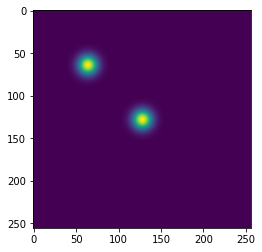

In [18]:
heatmap = generate_target([(128,128), (64,64)])
plt.imshow(heatmap)

In [23]:
x_list = []
y_list = []
peak_counter = 0
map_ori = heatmap
map = gaussian_filter(map_ori, sigma=3)

map_left = np.zeros(map.shape)
map_left[1:,:] = map[:-1,:]
map_right = np.zeros(map.shape)
map_right[:-1,:] = map[1:,:]
map_up = np.zeros(map.shape)
map_up[:,1:] = map[:,:-1]
map_down = np.zeros(map.shape)
map_down[:,:-1] = map[:,1:]

peaks_binary = np.logical_and.reduce((map>=map_left, map>=map_right, map>=map_up, map>=map_down, map > 0.1))
peaks = zip(np.nonzero(peaks_binary)[1], np.nonzero(peaks_binary)[0]) # note reverse
peaks = list(peaks)

peaks_with_score = [x + (map_ori[x[1],x[0]],) for x in peaks]
id = range(peak_counter, peak_counter + len(peaks))
peaks_with_score_and_id = [peaks_with_score[i] + (id[i],) for i in range(len(id))]

# all_peaks.append(peaks_with_score_and_id)
# peak_counter += len(peaks)

In [24]:
peaks_with_score_and_id

[(64, 64, 1.0, 0), (128, 128, 1.0, 1)]

In [29]:
map_left.shape

(256, 256)

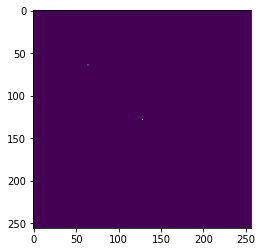

In [30]:
plt.imshow(peaks_binary)

In [31]:
np.nonzero(peaks_binary)

(array([ 64, 128]), array([ 64, 128]))

In [37]:
x_list = []
y_list = []
peak_counter = 0
map_ori = torch.from_numpy(heatmap)
map = gaussian_filter(map_ori, sigma=3)
map = torch.from_numpy(map)

map_left = torch.zeros(map.shape)
map_left[1:,:] = map[:-1,:]
map_right = torch.zeros(map.shape)
map_right[:-1,:] = map[1:,:]
map_up = torch.zeros(map.shape)
map_up[:,1:] = map[:,:-1]
map_down = torch.zeros(map.shape)
map_down[:,:-1] = map[:,1:]

peaks_binary = torch.logical_and.reduce((map>=map_left, map>=map_right, map>=map_up, map>=map_down, map > 0.1))
peaks = zip(np.nonzero(peaks_binary)[1], np.nonzero(peaks_binary)[0]) # note reverse
peaks = list(peaks)

peaks_with_score = [x + (map_ori[x[1],x[0]],) for x in peaks]
id = range(peak_counter, peak_counter + len(peaks))
peaks_with_score_and_id = [peaks_with_score[i] + (id[i],) for i in range(len(id))]

AttributeError: module 'torch' has no attribute 'logical_and'